# 2020-08-01 Exploring properties of the environment
I created an environment to simulate chossing shipping point (warehouse) assignment problems. This notebook explores things like behavior of reward across episodes, transport-related costs (which are important because they're essentially the reductions in cost that we want), cost per timestep, and an attempt to describe the theoretical optimum.

Results as of today (Aug 1) show that the best-fit heuristic is around 5\% close to optimal averaging around 5 episodes.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
%config InlineBackend.figure_format = 'retina'

# Can heuristic methods on this task be improved? 
The theoretical optimum would be no transport movements. See how best fit and random valid heuristic policies affect the overall cost

__Parameters__
```
num_dcs = 3
num_customers = 2
num_commodities = 4
orders_per_day = 2
dcs_per_customer = 3
demand_mean = 100
demand_var = 20
num_steps = 50
num_episodes = 5

```


Also modified transport cost to be equal for customers and dcs.

    

# 1 - Reward behavior on an episode for Best Fit
This is a sample run I took Jul 18 2020  of best fit agent (the one that has the most inventory of demanded products).
The chart shows how reward goes down initially as more orders appear, and stabilizes once the number of orders in the horizon is contstant. I want to analyze if this heuristic is closed to the theoretical optimum (no transport between warehouses). It's only for reference as I created it by copy pasting prints that maybe won't exist when I refactor the code.

**The best fit strategy:** Choose the shipping that holds the most inventory for the products that the customer needs. It's a heuristic based on the assumption that locally optimizing this allocation will reduce transport movements. Works best product allocation doesn't vary and customers order mutually exclusive product sets

Text(0.5, 1.0, 'Example of episode rewards for Best Fit')

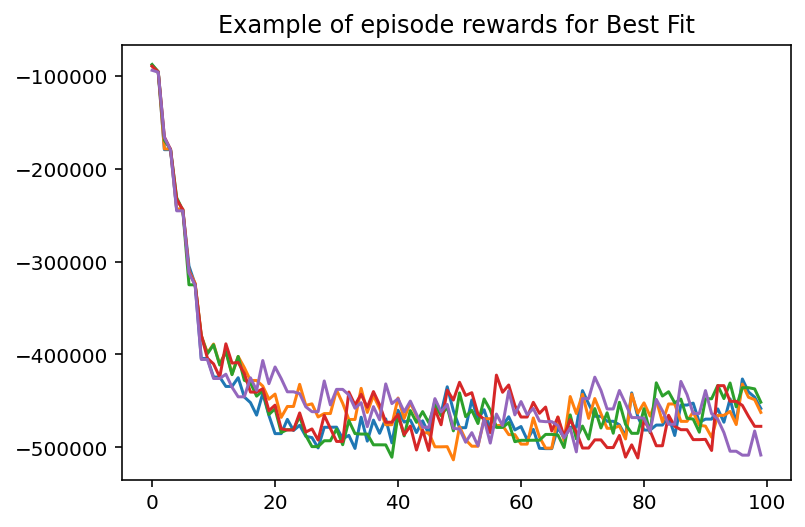

In [6]:
plt.plot([-88250.0, -96130.0, -179450.0, -179450.0, -244221.0, -244221.0, -304777.0, -324477.0, -404326.0, -404326.0, -424351.0, -424351.0, -434426.0, -434426.0, -425004.0, -445784.0, -451861.0, -465301.0, -441886.0, -465666.0, -485260.0, -485260.0, -469898.0, -481868.0, -476280.0, -488150.0, -489511.0, -500651.0, -478405.0, -478405.0, -478289.0, -490839.0, -487144.0, -501194.0, -467557.0, -493327.0, -470717.0, -484907.0, -469396.0, -495206.0, -460137.0, -472807.0, -470610.0, -484120.0, -471449.0, -485649.0, -449123.0, -463353.0, -434810.0, -460520.0, -478878.0, -478878.0, -449004.0, -469744.0, -459510.0, -480060.0, -476670.0, -476670.0, -467103.0, -481253.0, -477605.0, -491735.0, -480652.0, -501082.0, -501401.0, -501401.0, -478802.0, -489972.0, -478416.0, -478416.0, -438941.0, -453191.0, -466575.0, -466575.0, -471969.0, -471969.0, -475737.0, -487677.0, -441381.0, -467201.0, -481381.0, -481381.0, -476015.0, -476015.0, -466643.0, -487283.0, -454500.0, -454500.0, -452402.0, -473052.0, -469631.0, -469631.0, -458630.0, -472930.0, -447845.0, -473705.0, -426426.0, -440386.0, -445984.0, -458094.0])
plt.plot([-89239.0, -95429.0, -178618.0, -178618.0, -243288.0, -243288.0, -309951.0, -323261.0, -379409.0, -398349.0, -388757.0, -410677.0, -396257.0, -421077.0, -402143.0, -414153.0, -428002.0, -428002.0, -434050.0, -448160.0, -442662.0, -467742.0, -456013.0, -456013.0, -432172.0, -454872.0, -453171.0, -467301.0, -463633.0, -463633.0, -438417.0, -452587.0, -470003.0, -470003.0, -436492.0, -462392.0, -444167.0, -458057.0, -475657.0, -475657.0, -446897.0, -468857.0, -451926.0, -466146.0, -484369.0, -484369.0, -499450.0, -499450.0, -499280.0, -513470.0, -477804.0, -491904.0, -498799.0, -498799.0, -469196.0, -469196.0, -476481.0, -476481.0, -486319.0, -486319.0, -496554.0, -496554.0, -468349.0, -488949.0, -500857.0, -500857.0, -467363.0, -492943.0, -445297.0, -463557.0, -442914.0, -468814.0, -447461.0, -463671.0, -479503.0, -479503.0, -476945.0, -490985.0, -442653.0, -463163.0, -452129.0, -466389.0, -449103.0, -472703.0, -453312.0, -453312.0, -472032.0, -472032.0, -461899.0, -476289.0, -477180.0, -489180.0, -465584.0, -465584.0, -461360.0, -475480.0, -431890.0, -446100.0, -448636.0, -462426.0])
plt.plot([-87731.0, -95641.0, -169290.0, -179310.0, -231173.0, -244823.0, -324975.0, -324975.0, -380457.0, -399177.0, -389533.0, -411353.0, -396947.0, -421747.0, -402142.0, -427822.0, -430610.0, -444890.0, -438947.0, -464657.0, -458457.0, -484037.0, -480953.0, -480953.0, -466596.0, -487216.0, -499239.0, -499239.0, -492915.0, -492915.0, -480233.0, -497203.0, -471214.0, -485224.0, -485730.0, -485730.0, -497294.0, -497294.0, -497366.0, -510636.0, -464606.0, -487716.0, -460420.0, -473120.0, -461533.0, -473513.0, -453909.0, -465839.0, -456527.0, -482267.0, -441361.0, -467001.0, -460142.0, -474352.0, -447929.0, -459859.0, -478566.0, -478566.0, -473331.0, -493931.0, -492451.0, -492451.0, -492370.0, -492370.0, -486101.0, -486101.0, -486704.0, -500184.0, -465073.0, -490883.0, -477087.0, -491087.0, -458292.0, -479162.0, -462822.0, -484832.0, -451527.0, -475207.0, -484929.0, -484929.0, -458378.0, -484338.0, -430548.0, -444768.0, -440137.0, -452087.0, -448079.0, -468809.0, -469563.0, -483693.0, -447718.0, -447718.0, -433371.0, -447551.0, -430741.0, -456411.0, -435798.0, -435798.0, -437077.0, -451377.0])
plt.plot([-89613.0, -95823.0, -165869.0, -179119.0, -232957.0, -244187.0, -311266.0, -324596.0, -379042.0, -404112.0, -410201.0, -424441.0, -388549.0, -409319.0, -408595.0, -420415.0, -440514.0, -440514.0, -436920.0, -460530.0, -454558.0, -480038.0, -481345.0, -481345.0, -462973.0, -483553.0, -480183.0, -492173.0, -465524.0, -479724.0, -493652.0, -493652.0, -440441.0, -454401.0, -442922.0, -456902.0, -439953.0, -454193.0, -472978.0, -472978.0, -464583.0, -486423.0, -477092.0, -502852.0, -481353.0, -503343.0, -458734.0, -475704.0, -438483.0, -449073.0, -429994.0, -444134.0, -441188.0, -464178.0, -469971.0, -484201.0, -422234.0, -440714.0, -432876.0, -455006.0, -467364.0, -467364.0, -451533.0, -463383.0, -456628.0, -482388.0, -467470.0, -488180.0, -470106.0, -483366.0, -500755.0, -500755.0, -491981.0, -491981.0, -500261.0, -500261.0, -487231.0, -510521.0, -497329.0, -511479.0, -470400.0, -482320.0, -498313.0, -498313.0, -465503.0, -477333.0, -481021.0, -481021.0, -491710.0, -491710.0, -491427.0, -503387.0, -433596.0, -433596.0, -450465.0, -450465.0, -454846.0, -466676.0, -477394.0, -477394.0])
plt.plot([-93987.0, -95987.0, -166264.0, -179584.0, -245313.0, -245313.0, -312099.0, -325449.0, -405384.0, -405384.0, -425877.0, -425877.0, -421273.0, -435273.0, -445615.0, -445615.0, -425169.0, -438659.0, -406529.0, -431449.0, -413468.0, -425968.0, -440211.0, -440211.0, -442196.0, -456376.0, -461613.0, -461613.0, -428535.0, -454325.0, -437598.0, -437598.0, -443576.0, -457916.0, -451944.0, -477714.0, -456189.0, -470399.0, -431711.0, -452911.0, -447671.0, -461811.0, -450200.0, -464390.0, -478437.0, -478437.0, -447565.0, -461855.0, -453780.0, -479580.0, -480254.0, -494514.0, -484212.0, -498442.0, -469686.0, -495466.0, -464169.0, -476589.0, -439398.0, -465028.0, -450703.0, -464863.0, -458227.0, -471747.0, -472362.0, -472362.0, -476513.0, -489883.0, -479257.0, -504877.0, -447477.0, -447477.0, -424467.0, -438597.0, -458676.0, -458676.0, -438830.0, -453040.0, -467976.0, -467976.0, -468698.0, -482898.0, -448404.0, -460634.0, -475177.0, -475177.0, -429034.0, -443154.0, -463544.0, -463544.0, -438884.0, -463744.0, -469816.0, -484136.0, -504206.0, -504206.0, -508448.0, -508448.0, -482424.0, -508294.0])
plt.title("Example of episode rewards for Best Fit")

## Tranport costs related to Best Fit
(different, runs, trying to merge) If I subtract this to the total best fit, that would be the theoretical upper bound on the optimistic case (no inventory movements needed)

Text(0.5, 1.0, 'Example of transport related costs')

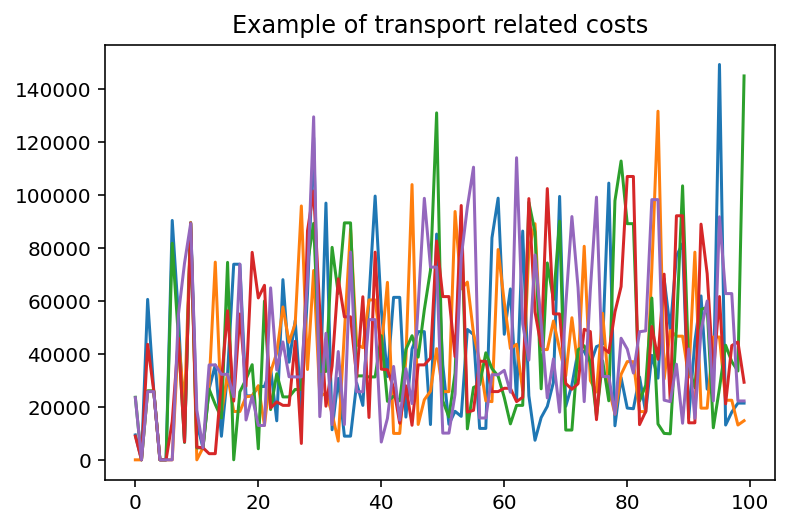

In [7]:
plt.plot([9420.0, 0.0, 60585.0, 25995.0, 0.0, 0.0, 90390.0, 54720.0, 6735.0, 89670.0, 13725.0, 4560.0, 26835.0, 35805.0, 8895.0, 32595.0, 73860.0, 73860.0, 24150.0, 24150.0, 27690.0, 27675.0, 34620.0, 14730.0, 68040.0, 36855.0, 52575.0, 19620.0, 62775.0, 121650.0, 22335.0, 96945.0, 11355.0, 30735.0, 8940.0, 8940.0, 28995.0, 20550.0, 61200.0, 99600.0, 56805.0, 31455.0, 61350.0, 61350.0, 16140.0, 41805.0, 48405.0, 48405.0, 13320.0, 85245.0, 35880.0, 13425.0, 18315.0, 16410.0, 49230.0, 47295.0, 11865.0, 11865.0, 83820.0, 98805.0, 47400.0, 64530.0, 22575.0, 86385.0, 24180.0, 7395.0, 15960.0, 20190.0, 29310.0, 99465.0, 20205.0, 28230.0, 40980.0, 40980.0, 36090.0, 42765.0, 43650.0, 104490.0, 12855.0, 31035.0, 19545.0, 19290.0, 31260.0, 18015.0, 39450.0, 30840.0, 68340.0, 49230.0, 76980.0, 81630.0, 15825.0, 44700.0, 61890.0, 26745.0, 25050.0, 149280.0, 13140.0, 18015.0, 21420.0, 21420.0])
plt.plot([0.0, 0.0, 25875.0, 25875.0, 0.0, 0.0, 0.0, 46020.0, 19965.0, 89565.0, 0.0, 4530.0, 28290.0, 74655.0, 17595.0, 32280.0, 18255.0, 18255.0, 23820.0, 24105.0, 28005.0, 13035.0, 33225.0, 40365.0, 57720.0, 44400.0, 51480.0, 95865.0, 34110.0, 71505.0, 24030.0, 25155.0, 17430.0, 7065.0, 48270.0, 87060.0, 43485.0, 42360.0, 60375.0, 60375.0, 41655.0, 67020.0, 9975.0, 9975.0, 38010.0, 103935.0, 13350.0, 22695.0, 25920.0, 41985.0, 25755.0, 25755.0, 93765.0, 64545.0, 67125.0, 47685.0, 37140.0, 22275.0, 21975.0, 79410.0, 59535.0, 42045.0, 43620.0, 26100.0, 79560.0, 89160.0, 41625.0, 41625.0, 52425.0, 41760.0, 31725.0, 53655.0, 34845.0, 80640.0, 29940.0, 25620.0, 55320.0, 27030.0, 17265.0, 32250.0, 37095.0, 37050.0, 18210.0, 18210.0, 72105.0, 131640.0, 30510.0, 48825.0, 46695.0, 46695.0, 31230.0, 78420.0, 19515.0, 19515.0, 46380.0, 46380.0, 22500.0, 22500.0, 13140.0, 14775.0])
plt.plot([23625.0, 0.0, 26055.0, 26055.0, 0.0, 0.0, 81780.0, 46335.0, 6600.0, 89205.0, 4530.0, 4530.0, 26700.0, 20925.0, 15795.0, 74565.0, 15.0, 25665.0, 30450.0, 35925.0, 4170.0, 59970.0, 18975.0, 32520.0, 23760.0, 23760.0, 26580.0, 26580.0, 74295.0, 89310.0, 33375.0, 33375.0, 80235.0, 62850.0, 89475.0, 89475.0, 31695.0, 31695.0, 31305.0, 31305.0, 46860.0, 22080.0, 24015.0, 22260.0, 41655.0, 46860.0, 38790.0, 56670.0, 71595.0, 131010.0, 22275.0, 16155.0, 32730.0, 92145.0, 11685.0, 27345.0, 28350.0, 40410.0, 34440.0, 31650.0, 23535.0, 13575.0, 20565.0, 20565.0, 97260.0, 85995.0, 26805.0, 74340.0, 60420.0, 90135.0, 11250.0, 11250.0, 41550.0, 43065.0, 36675.0, 16425.0, 37365.0, 22290.0, 97830.0, 112830.0, 89175.0, 89175.0, 22200.0, 28125.0, 61095.0, 13545.0, 9975.0, 9825.0, 50070.0, 103455.0, 34830.0, 27225.0, 56820.0, 57570.0, 12105.0, 27030.0, 43275.0, 37095.0, 33540.0, 144960.0])
plt.plot([8940.0, 0.0, 43620.0, 25950.0, 0.0, 0.0, 14520.0, 45945.0, 6735.0, 89310.0, 4800.0, 4545.0, 2325.0, 2325.0, 29730.0, 56295.0, 22170.0, 55080.0, 27825.0, 78345.0, 61140.0, 65895.0, 19605.0, 21885.0, 20565.0, 20565.0, 44775.0, 6180.0, 86490.0, 101520.0, 56055.0, 20250.0, 35415.0, 68355.0, 54000.0, 54000.0, 31170.0, 61575.0, 15990.0, 78420.0, 34245.0, 34020.0, 27240.0, 13800.0, 27945.0, 13050.0, 35850.0, 35850.0, 38415.0, 82635.0, 61635.0, 61635.0, 38955.0, 96030.0, 18015.0, 18690.0, 37215.0, 37215.0, 25770.0, 25770.0, 27015.0, 27015.0, 21990.0, 23625.0, 98640.0, 55905.0, 42945.0, 102420.0, 55095.0, 55095.0, 28815.0, 26640.0, 28755.0, 49290.0, 48405.0, 15165.0, 42465.0, 40500.0, 55815.0, 65415.0, 106995.0, 106995.0, 13290.0, 18240.0, 50355.0, 37965.0, 70110.0, 21990.0, 92160.0, 92160.0, 13980.0, 13980.0, 88995.0, 70275.0, 32385.0, 61650.0, 21135.0, 43125.0, 44505.0, 29295.0])
plt.plot([23460.0, 0.0, 25755.0, 25755.0, 0.0, 0.0, 0.0, 54765.0, 74265.0, 89235.0, 18795.0, 4545.0, 35835.0, 35835.0, 32295.0, 32295.0, 23805.0, 73890.0, 15045.0, 23955.0, 12975.0, 12975.0, 64935.0, 33915.0, 44520.0, 31365.0, 31305.0, 31305.0, 68265.0, 129510.0, 16305.0, 47775.0, 13320.0, 40890.0, 13305.0, 78450.0, 25710.0, 25710.0, 52950.0, 52950.0, 6720.0, 15660.0, 35265.0, 14985.0, 34410.0, 21240.0, 58200.0, 98745.0, 72765.0, 72765.0, 10095.0, 10095.0, 24855.0, 76470.0, 95475.0, 110505.0, 15795.0, 15795.0, 32130.0, 32130.0, 33795.0, 25530.0, 114075.0, 51285.0, 37650.0, 77370.0, 51690.0, 23370.0, 38115.0, 18000.0, 58215.0, 91860.0, 65040.0, 21975.0, 64170.0, 99195.0, 31485.0, 31485.0, 17265.0, 45915.0, 41835.0, 32760.0, 48375.0, 48705.0, 98250.0, 98250.0, 22530.0, 21975.0, 36105.0, 13815.0, 41865.0, 15675.0, 48825.0, 59985.0, 22245.0, 91770.0, 62775.0, 62775.0, 22230.0, 22230.0])
plt.title("Example of transport related costs")

## Putting together: 
Total costs are comprised of: inventory movements, transport to customers and inventory transport.

In [8]:
total_cost_1 = [97760.0, 103430.0, 176736.0, 182346.0, 261264.0, 253464.0, 344092.0, 344092.0, 394274.0, 401159.0, 393278.0, 408023.0, 422553.0, 428763.0, 417296.0, 456341.0, 422811.0, 444531.0, 451462.0, 451462.0, 470091.0, 470091.0, 452445.0, 467805.0, 481486.0, 481486.0, 451388.0, 488093.0, 483720.0, 500895.0, 450510.0, 494895.0, 507028.0, 507028.0, 451668.0, 503133.0, 513642.0, 462237.0, 432683.0, 441293.0, 424627.0, 424627.0, 428420.0, 446090.0, 418985.0, 448250.0, 443778.0, 443778.0, 492488.0, 492488.0, 437982.0, 490632.0, 517376.0, 524486.0, 512644.0, 512644.0, 450628.0, 450628.0, 419453.0, 405308.0, 377057.0, 379067.0, 391381.0, 405946.0, 433735.0, 433735.0, 440660.0, 447680.0, 443470.0, 450235.0, 408797.0, 451322.0, 437389.0, 465619.0, 453510.0, 491955.0, 495917.0, 495917.0, 483976.0, 490891.0, 446939.0, 456644.0, 433639.0, 470014.0, 483453.0, 483453.0, 489198.0, 496368.0, 502470.0, 509610.0, 482254.0, 489379.0, 499672.0, 506632.0, 471009.0, 463884.0, 425266.0, 448981.0, 418525.0, 425650.0]
transport_cost_1 =  [10005.0, 20175.0, 0.0, 24795.0, 31155.0, 0.0, 29895.0, 29895.0, 13320.0, 20370.0, 8070.0, 7065.0, 4590.0, 0.0, 47520.0, 39720.0, 8940.0, 20790.0, 0.0, 8895.0, 30150.0, 30150.0, 7980.0, 13365.0, 16125.0, 20580.0, 31320.0, 14610.0, 21195.0, 33600.0, 32640.0, 14640.0, 32160.0, 32160.0, 26985.0, 10005.0, 26910.0, 25635.0, 20355.0, 35325.0, 13125.0, 13125.0, 34020.0, 46080.0, 1710.0, 53115.0, 0.0, 0.0, 50010.0, 50010.0, 28530.0, 14700.0, 33660.0, 5820.0, 65985.0, 65985.0, 66510.0, 66510.0, 16695.0, 54210.0, 7095.0, 0.0, 6765.0, 0.0, 0.0, 13320.0, 61500.0, 24900.0, 16080.0, 26400.0, 17640.0, 13320.0, 5505.0, 30.0, 27750.0, 23865.0, 32595.0, 32595.0, 15930.0, 61980.0, 27420.0, 14505.0, 31410.0, 14520.0, 10230.0, 14670.0, 10245.0, 14700.0, 17910.0, 48000.0, 19020.0, 10185.0, 55740.0, 10230.0, 29100.0, 42270.0, 41895.0, 50775.0, 7680.0, 0.0]
cost_minus_transport_1 = np.array(total_cost_1) - np.array(transport_cost_1)

total_cost_2 = [103373.0, 103373.0, 182212.0, 182212.0, 246491.0, 252941.0, 337113.0, 343923.0, 395575.0, 401245.0, 401955.0, 407685.0, 428140.0, 428140.0, 416814.0, 456039.0, 444041.0, 444041.0, 403342.0, 451492.0, 470392.0, 470392.0, 468428.0, 468428.0, 482028.0, 482028.0, 482770.0, 488860.0, 460439.0, 501539.0, 459062.0, 478292.0, 490773.0, 490773.0, 479509.0, 507379.0, 437438.0, 488108.0, 481036.0, 488131.0, 481631.0, 488486.0, 498315.0, 503775.0, 511399.0, 518389.0, 491344.0, 491344.0, 476964.0, 476964.0, 425266.0, 425266.0, 415421.0, 407276.0, 407902.0, 407902.0, 421058.0, 421058.0, 403905.0, 434520.0, 414488.0, 441128.0, 433802.0, 468497.0, 480573.0, 480573.0, 497285.0, 497285.0, 428158.0, 469108.0, 496258.0, 496258.0, 500236.0, 500236.0, 504565.0, 511540.0, 500283.0, 500283.0, 483507.0, 507237.0, 477053.0, 477053.0, 465516.0, 493551.0, 503131.0, 509536.0, 519662.0, 526082.0, 492691.0, 498826.0, 470131.0, 510871.0, 493898.0, 493898.0, 511601.0, 511601.0, 497785.0, 504820.0, 518320.0, 518320.0]
transport_cost_2 =  [20175.0, 20175.0, 24915.0, 24915.0, 8400.0, 0.0, 0.0, 29835.0, 0.0, 20310.0, 0.0, 6975.0, 0.0, 0.0, 26700.0, 39765.0, 20505.0, 20505.0, 8910.0, 9000.0, 30090.0, 30090.0, 4440.0, 13350.0, 16350.0, 20745.0, 62385.0, 14655.0, 37515.0, 50520.0, 16035.0, 14700.0, 11055.0, 11055.0, 36660.0, 47220.0, 29175.0, 27465.0, 20700.0, 27000.0, 65865.0, 11895.0, 20685.0, 12945.0, 10215.0, 10215.0, 25560.0, 21375.0, 74535.0, 74535.0, 42630.0, 42630.0, 0.0, 23190.0, 13440.0, 13440.0, 13920.0, 13920.0, 8205.0, 21105.0, 0.0, 0.0, 47340.0, 15435.0, 11100.0, 11100.0, 85710.0, 55845.0, 0.0, 0.0, 24525.0, 23145.0, 16710.0, 16710.0, 55680.0, 39165.0, 19950.0, 19950.0, 32010.0, 57480.0, 11595.0, 11595.0, 9060.0, 11190.0, 135600.0, 10320.0, 59685.0, 54360.0, 82755.0, 15855.0, 26940.0, 44640.0, 10035.0, 10035.0, 34785.0, 34785.0, 9975.0, 14415.0, 50610.0, 50610.0]
cost_minus_transport_2 = np.array(total_cost_2) - np.array(transport_cost_2)

total_cost_3 = [97376.0, 103676.0, 176212.0, 182947.0, 247400.0, 253715.0, 330793.0, 344968.0, 401641.0, 401641.0, 393899.0, 408794.0, 403211.0, 429521.0, 456820.0, 456820.0, 411285.0, 455355.0, 414124.0, 462139.0, 453336.0, 460356.0, 470930.0, 470930.0, 433793.0, 465563.0, 469617.0, 475557.0, 456418.0, 456418.0, 453877.0, 453877.0, 450796.0, 476461.0, 469135.0, 469135.0, 466787.0, 473822.0, 494163.0, 501273.0, 468443.0, 497183.0, 498634.0, 505714.0, 490134.0, 486474.0, 440244.0, 445224.0, 460626.0, 460626.0, 444802.0, 449992.0, 424385.0, 429575.0, 418615.0, 442840.0, 432596.0, 439601.0, 424211.0, 438536.0, 448960.0, 448960.0, 400661.0, 440666.0, 464167.0, 464167.0, 455192.0, 491942.0, 482953.0, 489628.0, 476226.0, 508611.0, 503163.0, 508533.0, 498729.0, 488619.0, 438797.0, 452057.0, 444039.0, 446859.0, 425636.0, 428561.0, 441709.0, 447289.0, 372657.0, 379782.0, 386837.0, 386837.0, 395074.0, 401149.0, 426581.0, 426581.0, 422397.0, 422397.0, 380069.0, 419354.0, 385882.0, 427507.0, 407438.0, 444443.0]
transport_cost_3 =  [17565.0, 20265.0, 0.0, 24900.0, 8490.0, 0.0, 26235.0, 30030.0, 6960.0, 20220.0, 8025.0, 7110.0, 780.0, 0.0, 15990.0, 29370.0, 43110.0, 20760.0, 17565.0, 29145.0, 33285.0, 16965.0, 23700.0, 32565.0, 4440.0, 17610.0, 54000.0, 46920.0, 21165.0, 30000.0, 0.0, 4470.0, 12645.0, 34890.0, 21150.0, 22845.0, 0.0, 30.0, 17985.0, 31695.0, 0.0, 18810.0, 67095.0, 10860.0, 58470.0, 65595.0, 57360.0, 9990.0, 60090.0, 35880.0, 9960.0, 45525.0, 13605.0, 13605.0, 29550.0, 31455.0, 0.0, 28410.0, 57720.0, 17205.0, 36405.0, 36405.0, 2595.0, 4440.0, 41625.0, 0.0, 6600.0, 29595.0, 18435.0, 8085.0, 34440.0, 27000.0, 114750.0, 10155.0, 106905.0, 60705.0, 31095.0, 29355.0, 26415.0, 41880.0, 24705.0, 9300.0, 10170.0, 94830.0, 13290.0, 20310.0, 7080.0, 13245.0, 4470.0, 1815.0, 32460.0, 31020.0, 20580.0, 30615.0, 8790.0, 18885.0, 21645.0, 10260.0, 14100.0, 35850.0]
cost_minus_transport_3 = np.array(total_cost_3) - np.array(transport_cost_3)

total_cost_4 = [102775.0, 102775.0, 176062.0, 181582.0, 251957.0, 252122.0, 329842.0, 343792.0, 394638.0, 401628.0, 389526.0, 409071.0, 398139.0, 430029.0, 450918.0, 457383.0, 411399.0, 455274.0, 430910.0, 462005.0, 449737.0, 456577.0, 462218.0, 462218.0, 431770.0, 438910.0, 449119.0, 449119.0, 431461.0, 472321.0, 446091.0, 474096.0, 475697.0, 475697.0, 490326.0, 497046.0, 515322.0, 515322.0, 506539.0, 506539.0, 507391.0, 507391.0, 524711.0, 524711.0, 472591.0, 499441.0, 485444.0, 485444.0, 491734.0, 498709.0, 447657.0, 482007.0, 454672.0, 493807.0, 484672.0, 484672.0, 491211.0, 497691.0, 491564.0, 491564.0, 504315.0, 504315.0, 469830.0, 495765.0, 481753.0, 512278.0, 501159.0, 507459.0, 522941.0, 522941.0, 518395.0, 518395.0, 484813.0, 484813.0, 499800.0, 499800.0, 500545.0, 500545.0, 506566.0, 506566.0, 512284.0, 518209.0, 460416.0, 480531.0, 466190.0, 472430.0, 450595.0, 489400.0, 475696.0, 482296.0, 463233.0, 470223.0, 475319.0, 475319.0, 462765.0, 462765.0, 440896.0, 461611.0, 454378.0, 478138.0]
transport_cost_4 =  [20025.0, 20025.0, 0.0, 24780.0, 5685.0, 0.0, 21015.0, 29865.0, 13275.0, 20370.0, 25740.0, 7050.0, 24690.0, 0.0, 16125.0, 29475.0, 1470.0, 20775.0, 62370.0, 32940.0, 6510.0, 21240.0, 0.0, 51210.0, 10590.0, 17235.0, 0.0, 4395.0, 56040.0, 25665.0, 12000.0, 25770.0, 5925.0, 5925.0, 36060.0, 9180.0, 38205.0, 36540.0, 26535.0, 26535.0, 9945.0, 9945.0, 53115.0, 53115.0, 28350.0, 41505.0, 14370.0, 14370.0, 28935.0, 44010.0, 39405.0, 15885.0, 28410.0, 36615.0, 16650.0, 15015.0, 77730.0, 33270.0, 15105.0, 15105.0, 37665.0, 36045.0, 48105.0, 10245.0, 59280.0, 31845.0, 79260.0, 11910.0, 33645.0, 31860.0, 61155.0, 61155.0, 11685.0, 13260.0, 27030.0, 27030.0, 21120.0, 21120.0, 15615.0, 15615.0, 120240.0, 65580.0, 15225.0, 35340.0, 61440.0, 10185.0, 48435.0, 35175.0, 94920.0, 39900.0, 10290.0, 22110.0, 39975.0, 39975.0, 29295.0, 27630.0, 60615.0, 10440.0, 10230.0, 30990.0]
cost_minus_transport_4 = np.array(total_cost_4) - np.array(transport_cost_4)

total_cost_5 = [97897.0, 103192.0, 175422.0, 182307.0, 246619.0, 252664.0, 338383.0, 343993.0, 406060.0, 431635.0, 414870.0, 420855.0, 441434.0, 448514.0, 434794.0, 473644.0, 451927.0, 458542.0, 485961.0, 485961.0, 504045.0, 504045.0, 456193.0, 456193.0, 457611.0, 470631.0, 464574.0, 479739.0, 456175.0, 462340.0, 456152.0, 475157.0, 440351.0, 488276.0, 477473.0, 505478.0, 464567.0, 464567.0, 415332.0, 434877.0, 417562.0, 417562.0, 444447.0, 444447.0, 447527.0, 454772.0, 464760.0, 471600.0, 422972.0, 460502.0, 431699.0, 470609.0, 483077.0, 483077.0, 504053.0, 504053.0, 498233.0, 504803.0, 490296.0, 509076.0, 465890.0, 465890.0, 455206.0, 487846.0, 468718.0, 468718.0, 489353.0, 489353.0, 474348.0, 474348.0, 454948.0, 487033.0, 493985.0, 500300.0, 474551.0, 481211.0, 427346.0, 427346.0, 424668.0, 430443.0, 451938.0, 457518.0, 460577.0, 466502.0, 460893.0, 467868.0, 440023.0, 475723.0, 447966.0, 454896.0, 441271.0, 447916.0, 422562.0, 457692.0, 415449.0, 437724.0, 447193.0, 447193.0, 465122.0, 465122.0]
transport_cost_5 =  [9840.0, 20085.0, 0.0, 24750.0, 8445.0, 0.0, 0.0, 0.0, 39915.0, 38085.0, 0.0, 0.0, 24360.0, 2445.0, 47460.0, 42585.0, 0.0, 0.0, 13230.0, 9075.0, 75615.0, 75615.0, 4410.0, 13290.0, 10335.0, 18015.0, 14040.0, 44610.0, 20640.0, 14520.0, 38940.0, 14610.0, 26940.0, 10260.0, 22305.0, 9975.0, 60360.0, 55830.0, 49470.0, 44775.0, 0.0, 0.0, 17640.0, 17640.0, 36255.0, 10140.0, 38130.0, 38625.0, 22230.0, 17550.0, 36825.0, 15360.0, 17655.0, 5820.0, 38115.0, 26715.0, 33570.0, 23130.0, 50835.0, 70320.0, 5655.0, 5655.0, 73545.0, 47025.0, 6900.0, 6900.0, 0.0, 42285.0, 10350.0, 14775.0, 60945.0, 14235.0, 59310.0, 46155.0, 40785.0, 81540.0, 26280.0, 24660.0, 0.0, 0.0, 0.0, 18450.0, 41475.0, 26265.0, 15765.0, 19905.0, 63465.0, 47880.0, 74655.0, 34530.0, 53280.0, 17295.0, 0.0, 47475.0, 0.0, 18105.0, 9255.0, 9255.0, 28125.0, 28125.0]
cost_minus_transport_5 = np.array(total_cost_5) - np.array(transport_cost_5)

This plot is backwards because I took the cost directly, the other one was reward (negative cost)

Text(0.5, 1.0, 'Cost per timestep on 5 runs')

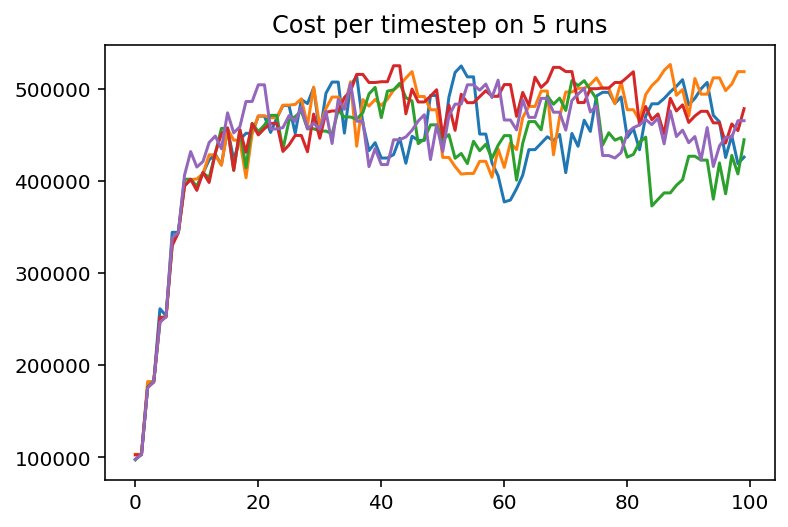

In [9]:
plt.plot(total_cost_1)
plt.plot(total_cost_2)
plt.plot(total_cost_3)
plt.plot(total_cost_4)
plt.plot(total_cost_5)
plt.title("Cost per timestep on 5 runs")

This is very varaiable because it depends on the randomness of the order generator

Text(0.5, 1.0, 'Transport per timestep on 5 runs')

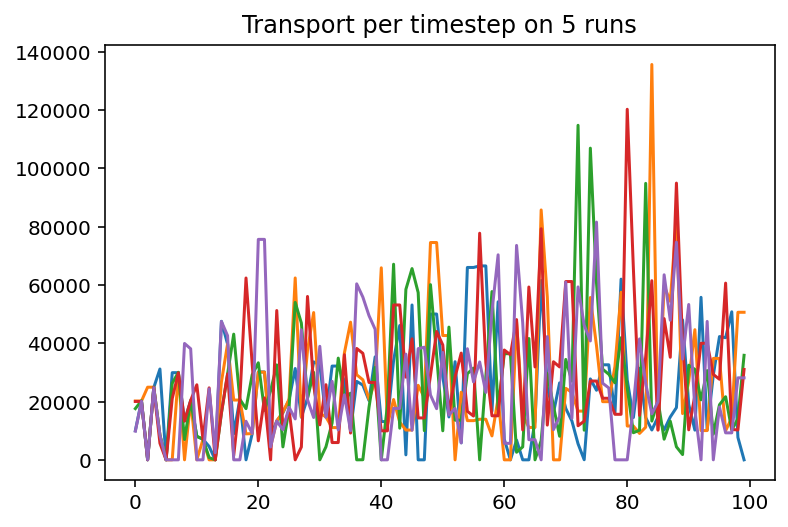

In [10]:
plt.plot(transport_cost_1)
plt.plot(transport_cost_2)
plt.plot(transport_cost_3)
plt.plot(transport_cost_4)
plt.plot(transport_cost_5)
plt.title("Transport per timestep on 5 runs")

Cost without transport is way lower!

Text(0.5, 1.0, 'Total cost with transport costs subtracted')

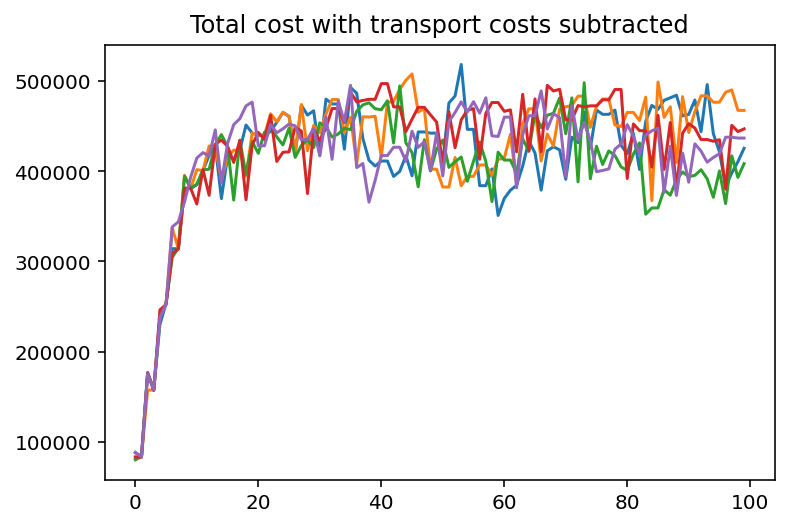

In [11]:
plt.plot(cost_minus_transport_1)
plt.plot(cost_minus_transport_2)
plt.plot(cost_minus_transport_3)
plt.plot(cost_minus_transport_4)
plt.plot(cost_minus_transport_5)
plt.title("Total cost with transport costs subtracted")

## Comparison of theoretical lower bound with actual best fit cost on each episode

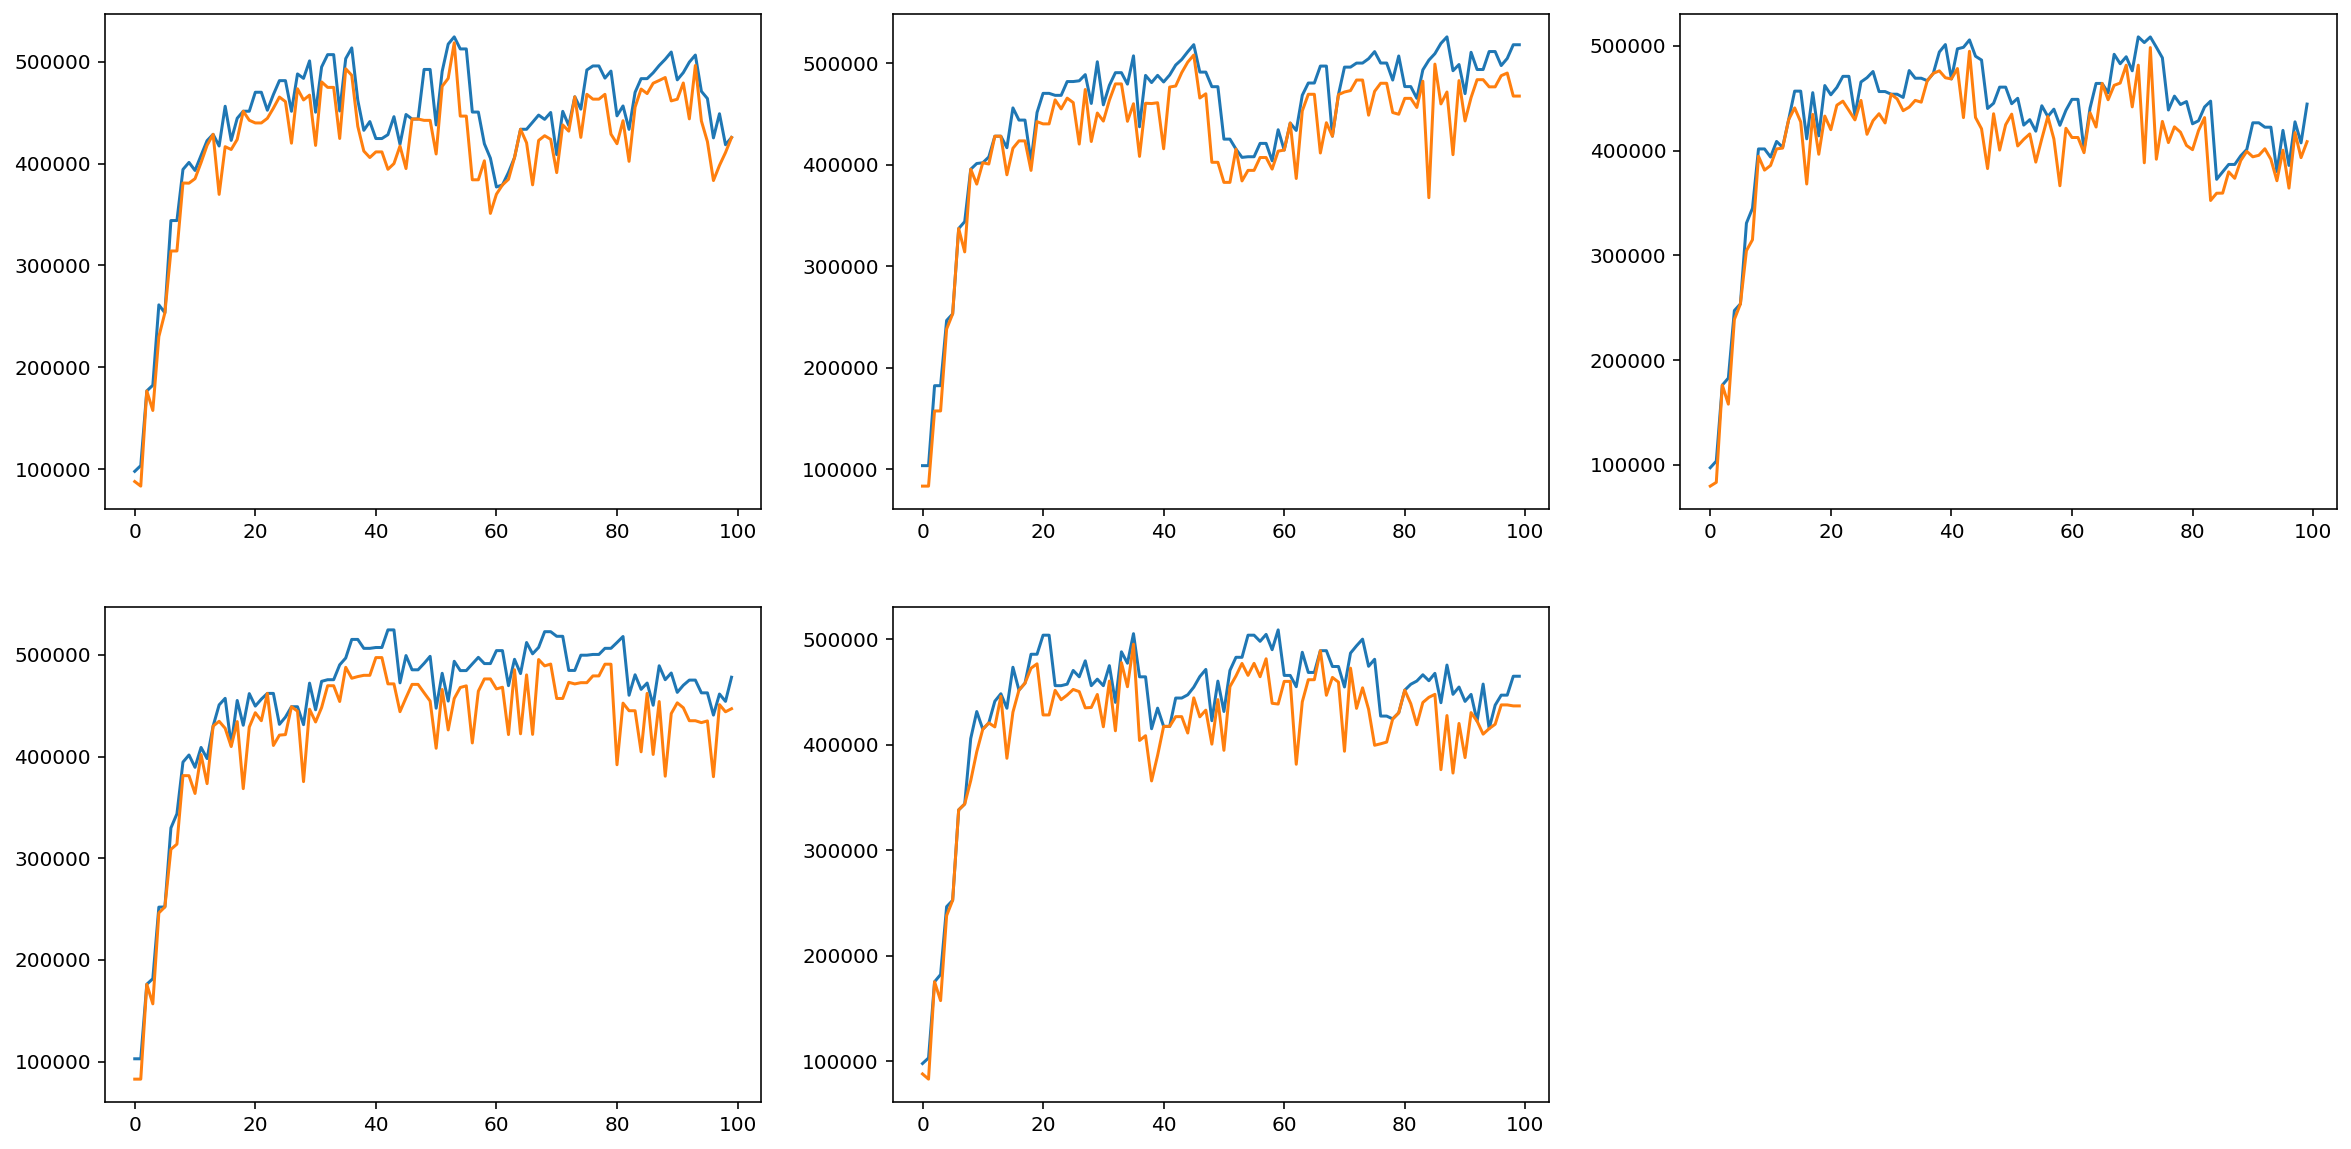

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.plot(total_cost_1)
plt.plot(cost_minus_transport_1)

plt.subplot(232)
plt.plot(total_cost_2)
plt.plot(cost_minus_transport_2)

plt.subplot(233)
plt.plot(total_cost_3)
plt.plot(cost_minus_transport_3)

plt.subplot(234)
plt.plot(total_cost_4)
plt.plot(cost_minus_transport_4)
plt.subplot(235)
plt.plot(total_cost_5)
plt.plot(cost_minus_transport_5)

## Ratio of Best fit and theoretical
Based on the cost without the transport, this is how much best fit choices are far from optimal in this environment. Without transport movements, cost could be around 5% less.

In [13]:
data = pd.concat([pd.Series(total_cost_1,name='total_cost_1'),pd.Series(total_cost_2,name='total_cost_2'),pd.Series(total_cost_3,name='total_cost_3'),pd.Series(total_cost_4,name='total_cost_4'),pd.Series(total_cost_5,name='total_cost_5'),pd.Series(transport_cost_1,name='transport_cost_1'),pd.Series(transport_cost_2,name='transport_cost_2'),pd.Series(transport_cost_3,name='transport_cost_3'),pd.Series(transport_cost_4,name='transport_cost_4'),pd.Series(transport_cost_5,name='transport_cost_5'),pd.Series(cost_minus_transport_1,name='cost_minus_transport_1'),pd.Series(cost_minus_transport_2,name='cost_minus_transport_2'),pd.Series(cost_minus_transport_3,name='cost_minus_transport_3'),pd.Series(cost_minus_transport_4,name='cost_minus_transport_4'),pd.Series(cost_minus_transport_5,name='cost_minus_transport_5')],axis=1)
ratio_theoretical_1 = (data.total_cost_1.sum()-data.cost_minus_transport_1.sum())/data.total_cost_1.sum()
ratio_theoretical_2 = (data.total_cost_2.sum()-data.cost_minus_transport_2.sum())/data.total_cost_2.sum()
ratio_theoretical_3 = (data.total_cost_3.sum()-data.cost_minus_transport_3.sum())/data.total_cost_3.sum()
ratio_theoretical_4 = (data.total_cost_4.sum()-data.cost_minus_transport_4.sum())/data.total_cost_4.sum()
ratio_theoretical_5 = (data.total_cost_5.sum()-data.cost_minus_transport_5.sum())/data.total_cost_5.sum()

theoretical_ratios = [ratio_theoretical_1,ratio_theoretical_2,ratio_theoretical_3,ratio_theoretical_4,ratio_theoretical_5]
ratios_bestfit_df=pd.DataFrame(theoretical_ratios,columns=['theoretical_ratio_from_optimal'])
ratios_bestfit_df

,theoretical_ratio_from_optimal
0,0.053354
1,0.056368
2,0.057766
3,0.062452
4,0.057600


In [14]:
# TO DO: valdra la pena hacerlo con otros agentes? Tal vez con uno random que solamente use los puntos validos (los otros tienen demasiados BIG Ms para hacer una comparación justa)

# 2- Reward behavior for random valid
Random valid is a heuristic policy that only chooses between the valid distribution centers that a customer has, so it makes no invalid movements. 

The hypothesis is that if best fit helps in anything, it should perform signifcantly better than random valid.


## Theoretical vs actual cost

In [15]:
randomvalid_step_costs_1 = [122910.0, 115455.0, 204600.0, 165120.0, 259944.0, 223599.0, 332887.0, 332887.0, 414568.0, 414568.0, 418264.0, 432349.0, 406890.0, 422160.0, 395291.0, 403361.0, 415161.0, 415161.0, 436874.0, 440579.0, 451608.0, 454833.0, 459984.0, 475164.0, 493828.0, 448843.0, 392001.0, 432921.0, 454125.0, 454125.0, 444231.0, 446541.0, 413791.0, 413791.0, 438098.0, 394283.0, 397679.0, 397679.0, 367971.0, 367971.0, 393352.0, 378337.0, 385591.0, 359491.0, 392806.0, 377731.0, 401775.0, 383085.0, 421154.0, 414239.0, 429772.0, 429772.0, 410634.0, 425889.0, 451625.0, 445805.0, 410640.0, 402945.0, 427186.0, 427186.0, 461433.0, 470883.0, 476996.0, 463571.0, 432540.0, 473385.0, 463670.0, 463670.0, 403240.0, 403240.0, 414371.0, 414371.0, 383821.0, 383821.0, 406976.0, 414086.0, 441605.0, 426335.0, 456991.0, 420931.0, 424753.0, 424753.0, 409439.0, 415829.0, 451254.0, 408159.0, 438476.0, 423161.0, 420550.0, 420550.0, 436905.0, 452070.0, 440314.0, 440314.0, 453392.0, 441167.0, 432988.0, 432208.0, 459231.0, 414546.0]
random_valid_step_transport_costs_1 = [22560.0, 22740.0, 17130.0, 11535.0, 0.0, 3180.0, 15585.0, 15585.0, 0.0, 0.0, 31695.0, 7125.0, 6600.0, 58905.0, 15885.0, 17130.0, 17820.0, 17820.0, 52995.0, 28800.0, 38025.0, 16875.0, 60570.0, 21375.0, 46260.0, 55755.0, 21735.0, 18645.0, 50220.0, 50220.0, 70320.0, 19530.0, 14115.0, 14115.0, 22710.0, 25275.0, 40380.0, 29175.0, 3015.0, 3015.0, 15300.0, 29655.0, 0.0, 0.0, 10590.0, 13125.0, 0.0, 6795.0, 50490.0, 27585.0, 2130.0, 2130.0, 20895.0, 17385.0, 27570.0, 69195.0, 9915.0, 4095.0, 16140.0, 0.0, 57495.0, 38355.0, 61320.0, 30435.0, 36660.0, 5385.0, 76200.0, 91230.0, 20655.0, 20655.0, 20100.0, 26550.0, 12870.0, 12870.0, 35715.0, 10815.0, 25410.0, 5175.0, 50040.0, 36525.0, 10545.0, 10545.0, 29355.0, 16170.0, 58230.0, 21000.0, 49605.0, 9930.0, 20400.0, 20400.0, 23895.0, 5535.0, 38355.0, 38355.0, 40230.0, 48675.0, 21795.0, 13710.0, 61260.0, 54855.0]
rv_cost_minus_transports_1 = np.array(randomvalid_step_costs_1)-np.array(random_valid_step_transport_costs_1)

randomvalid_step_costs_2 = [113257.0, 113257.0, 192981.0, 168456.0, 250636.0, 265711.0, 317233.0, 317233.0, 361627.0, 382792.0, 400659.0, 412149.0, 426290.0, 441470.0, 432837.0, 432837.0, 480492.0, 435687.0, 368062.0, 370927.0, 385106.0, 370841.0, 384043.0, 384748.0, 374218.0, 374218.0, 367105.0, 367105.0, 374942.0, 374942.0, 397157.0, 397157.0, 417862.0, 417862.0, 458934.0, 454629.0, 462041.0, 462041.0, 392377.0, 435097.0, 363673.0, 363673.0, 366110.0, 366110.0, 379813.0, 395803.0, 370884.0, 370884.0, 405415.0, 405415.0, 413253.0, 401448.0, 366471.0, 366471.0, 380583.0, 380583.0, 393155.0, 389615.0, 392090.0, 367400.0, 388244.0, 395864.0, 431264.0, 431264.0, 447756.0, 432711.0, 439362.0, 430182.0, 426827.0, 427127.0, 392590.0, 428620.0, 411760.0, 418000.0, 384207.0, 426387.0, 433435.0, 433435.0, 432659.0, 428339.0, 427758.0, 427758.0, 377134.0, 377134.0, 368878.0, 377293.0, 367592.0, 367592.0, 370827.0, 384642.0, 366542.0, 380432.0, 400921.0, 400921.0, 369475.0, 375385.0, 374561.0, 387146.0, 417950.0, 402920.0]
random_valid_step_transport_costs_2 = [29400.0, 29400.0, 0.0, 16110.0, 0.0, 11730.0, 27735.0, 27735.0, 6795.0, 10515.0, 0.0, 8955.0, 14040.0, 39630.0, 0.0, 0.0, 83040.0, 67320.0, 8370.0, 12540.0, 13995.0, 17250.0, 21045.0, 13845.0, 16740.0, 16740.0, 3420.0, 3420.0, 7680.0, 7680.0, 5505.0, 5505.0, 11160.0, 2250.0, 76740.0, 32865.0, 28080.0, 67725.0, 17340.0, 75450.0, 2970.0, 5205.0, 0.0, 2025.0, 0.0, 24330.0, 10155.0, 10155.0, 13680.0, 13680.0, 34770.0, 41430.0, 3660.0, 0.0, 30405.0, 30405.0, 4260.0, 29445.0, 18300.0, 0.0, 20475.0, 11220.0, 19635.0, 9990.0, 68940.0, 32955.0, 30105.0, 40980.0, 34590.0, 35460.0, 19965.0, 56985.0, 13740.0, 24600.0, 5025.0, 30180.0, 9960.0, 7950.0, 6915.0, 5625.0, 55305.0, 55305.0, 9540.0, 9540.0, 17325.0, 27900.0, 6795.0, 6795.0, 3075.0, 37890.0, 0.0, 10095.0, 40620.0, 40620.0, 840.0, 8760.0, 1755.0, 16605.0, 44520.0, 35310.0]
rv_cost_minus_transports_2 = np.array(randomvalid_step_costs_2)-np.array(random_valid_step_transport_costs_2)

randomvalid_step_costs_3 = [127956.0, 127956.0, 182199.0, 172164.0, 239372.0, 238997.0, 324965.0, 306755.0, 352871.0, 355841.0, 369597.0, 369597.0, 367068.0, 403938.0, 395451.0, 432336.0, 420460.0, 408805.0, 416363.0, 425753.0, 410411.0, 425696.0, 424932.0, 424932.0, 472491.0, 472491.0, 470556.0, 445191.0, 424412.0, 414092.0, 451757.0, 456767.0, 430793.0, 430793.0, 390181.0, 390181.0, 424635.0, 409350.0, 374701.0, 374701.0, 376521.0, 419586.0, 415866.0, 431556.0, 401177.0, 393602.0, 385440.0, 385440.0, 407239.0, 392029.0, 368342.0, 392972.0, 418458.0, 373938.0, 399815.0, 399815.0, 382208.0, 399368.0, 428666.0, 387671.0, 401819.0, 396344.0, 373206.0, 416511.0, 436309.0, 428629.0, 434959.0, 434959.0, 469447.0, 469447.0, 501185.0, 485975.0, 404939.0, 447344.0, 411392.0, 454157.0, 482941.0, 439006.0, 433954.0, 395194.0, 412969.0, 374824.0, 379794.0, 379794.0, 361779.0, 361779.0, 365530.0, 370180.0, 393905.0, 408905.0, 440961.0, 440961.0, 445123.0, 441328.0, 439247.0, 427052.0, 426274.0, 438364.0, 398047.0, 398047.0]
random_valid_step_transport_costs_3 = [27255.0, 27255.0, 31350.0, 10035.0, 645.0, 9960.0, 0.0, 18330.0, 0.0, 1725.0, 0.0, 0.0, 4200.0, 11370.0, 45615.0, 51750.0, 0.0, 13710.0, 38475.0, 1440.0, 21195.0, 46020.0, 420.0, 420.0, 17775.0, 17775.0, 54435.0, 71685.0, 4215.0, 2700.0, 30945.0, 13500.0, 60600.0, 60600.0, 14040.0, 14040.0, 55845.0, 29835.0, 4620.0, 4620.0, 7380.0, 12405.0, 19350.0, 31590.0, 14010.0, 6165.0, 14715.0, 25380.0, 14430.0, 14430.0, 3435.0, 14625.0, 7800.0, 22305.0, 26760.0, 26760.0, 10290.0, 13320.0, 35550.0, 26580.0, 0.0, 23010.0, 18390.0, 26175.0, 12750.0, 24120.0, 0.0, 0.0, 11850.0, 11850.0, 98460.0, 79065.0, 20550.0, 35550.0, 14370.0, 9075.0, 52860.0, 33600.0, 42150.0, 26640.0, 26520.0, 11550.0, 32625.0, 32625.0, 11130.0, 11130.0, 0.0, 6990.0, 17925.0, 0.0, 39930.0, 39930.0, 2310.0, 41940.0, 30000.0, 28995.0, 31470.0, 36015.0, 32160.0, 24960.0]
rv_cost_minus_transports_3 = np.array(randomvalid_step_costs_3)-np.array(random_valid_step_transport_costs_3)

randomvalid_step_costs_4 = [95599.0, 108289.0, 171282.0, 182997.0, 257507.0, 257507.0, 328344.0, 328344.0, 364127.0, 408662.0, 436789.0, 448564.0, 473743.0, 469333.0, 466526.0, 451541.0, 447859.0, 462979.0, 404393.0, 419693.0, 412077.0, 456882.0, 460840.0, 421480.0, 448754.0, 445034.0, 473844.0, 470664.0, 469873.0, 485248.0, 489007.0, 444397.0, 467387.0, 467387.0, 466292.0, 469352.0, 443668.0, 443668.0, 432262.0, 413827.0, 391918.0, 391918.0, 412789.0, 371164.0, 367269.0, 366624.0, 395061.0, 375591.0, 368369.0, 401384.0, 403228.0, 403228.0, 421575.0, 421575.0, 402801.0, 415761.0, 379740.0, 379740.0, 413495.0, 390140.0, 380053.0, 380053.0, 391725.0, 391725.0, 372690.0, 364875.0, 386039.0, 360974.0, 379997.0, 351062.0, 382273.0, 372103.0, 360215.0, 384350.0, 368679.0, 406944.0, 377256.0, 377256.0, 390663.0, 407238.0, 425723.0, 425723.0, 388267.0, 377302.0, 362396.0, 385886.0, 417973.0, 417973.0, 436869.0, 436869.0, 455297.0, 470267.0, 410405.0, 449765.0, 478667.0, 478667.0, 401682.0, 401682.0, 421689.0, 421689.0]
random_valid_step_transport_costs_4 = [7440.0, 0.0, 2805.0, 25875.0, 32370.0, 32370.0, 19155.0, 19155.0, 8100.0, 495.0, 25170.0, 4305.0, 35145.0, 48705.0, 50625.0, 22320.0, 42825.0, 90240.0, 10095.0, 1920.0, 20565.0, 32865.0, 4650.0, 9240.0, 25095.0, 13485.0, 41775.0, 36165.0, 58815.0, 46425.0, 48945.0, 7470.0, 27165.0, 41655.0, 19920.0, 10905.0, 48210.0, 48210.0, 7215.0, 18150.0, 31275.0, 31275.0, 57525.0, 17385.0, 1665.0, 3165.0, 12645.0, 21045.0, 9105.0, 13110.0, 12015.0, 12015.0, 32415.0, 12855.0, 35685.0, 31260.0, 18435.0, 18435.0, 0.0, 47550.0, 22680.0, 22680.0, 17685.0, 17685.0, 12210.0, 6270.0, 11880.0, 12240.0, 555.0, 555.0, 8415.0, 10695.0, 9135.0, 16470.0, 795.0, 29325.0, 22560.0, 22560.0, 13965.0, 18555.0, 46110.0, 46110.0, 3090.0, 24480.0, 1515.0, 7485.0, 5670.0, 5670.0, 6600.0, 8355.0, 22650.0, 44265.0, 24990.0, 11325.0, 75405.0, 76695.0, 22980.0, 22980.0, 16140.0, 6450.0]
rv_cost_minus_transports_4 = np.array(randomvalid_step_costs_4)-np.array(random_valid_step_transport_costs_4)

randomvalid_step_costs_5 = [89603.0, 89603.0, 192080.0, 192080.0, 237855.0, 237855.0, 299588.0, 299588.0, 404495.0, 389210.0, 396998.0, 415223.0, 412343.0, 452843.0, 449838.0, 449838.0, 471707.0, 468467.0, 442509.0, 457569.0, 411085.0, 382825.0, 391985.0, 424355.0, 374536.0, 374536.0, 371329.0, 375694.0, 376903.0, 376903.0, 386079.0, 386079.0, 390780.0, 390780.0, 431197.0, 393592.0, 419817.0, 390372.0, 378807.0, 381732.0, 380664.0, 383289.0, 386236.0, 381331.0, 371819.0, 389879.0, 418197.0, 406857.0, 432321.0, 430296.0, 421807.0, 421807.0, 437526.0, 437526.0, 427044.0, 442164.0, 435730.0, 455455.0, 478541.0, 480056.0, 479105.0, 461420.0, 430752.0, 436542.0, 430779.0, 423219.0, 429564.0, 429564.0, 434858.0, 430238.0, 423996.0, 423996.0, 434692.0, 390112.0, 365791.0, 389731.0, 408537.0, 417192.0, 403016.0, 405401.0, 389432.0, 416162.0, 422241.0, 410031.0, 435314.0, 430724.0, 413405.0, 458000.0, 417726.0, 419421.0, 387995.0, 395615.0, 386420.0, 386420.0, 402839.0, 402839.0, 378390.0, 423015.0, 454298.0, 409658.0]
random_valid_step_transport_costs_5 = [10740.0, 10740.0, 21870.0, 21870.0, 15930.0, 15930.0, 0.0, 0.0, 18780.0, 0.0, 8400.0, 2430.0, 40455.0, 44115.0, 10725.0, 4410.0, 13155.0, 6270.0, 37125.0, 85890.0, 22560.0, 2460.0, 10860.0, 44205.0, 0.0, 1680.0, 13215.0, 13125.0, 15510.0, 15510.0, 0.0, 0.0, 0.0, 0.0, 38175.0, 5670.0, 24645.0, 19905.0, 19050.0, 11085.0, 3600.0, 3210.0, 6945.0, 15210.0, 0.0, 3675.0, 40545.0, 870.0, 39195.0, 57180.0, 21855.0, 21855.0, 2985.0, 2985.0, 47070.0, 25575.0, 58155.0, 13860.0, 29985.0, 51675.0, 58695.0, 26250.0, 38940.0, 44340.0, 39315.0, 26550.0, 37335.0, 37335.0, 20685.0, 31590.0, 23760.0, 32310.0, 29790.0, 27045.0, 2760.0, 4785.0, 34035.0, 4770.0, 22965.0, 21735.0, 1575.0, 34350.0, 40800.0, 14670.0, 40590.0, 23430.0, 29910.0, 37770.0, 37800.0, 37635.0, 0.0, 7260.0, 24870.0, 26355.0, 15570.0, 15570.0, 0.0, 0.0, 30015.0, 29490.0]
rv_cost_minus_transports_5 = np.array(randomvalid_step_costs_5)-np.array(random_valid_step_transport_costs_5)

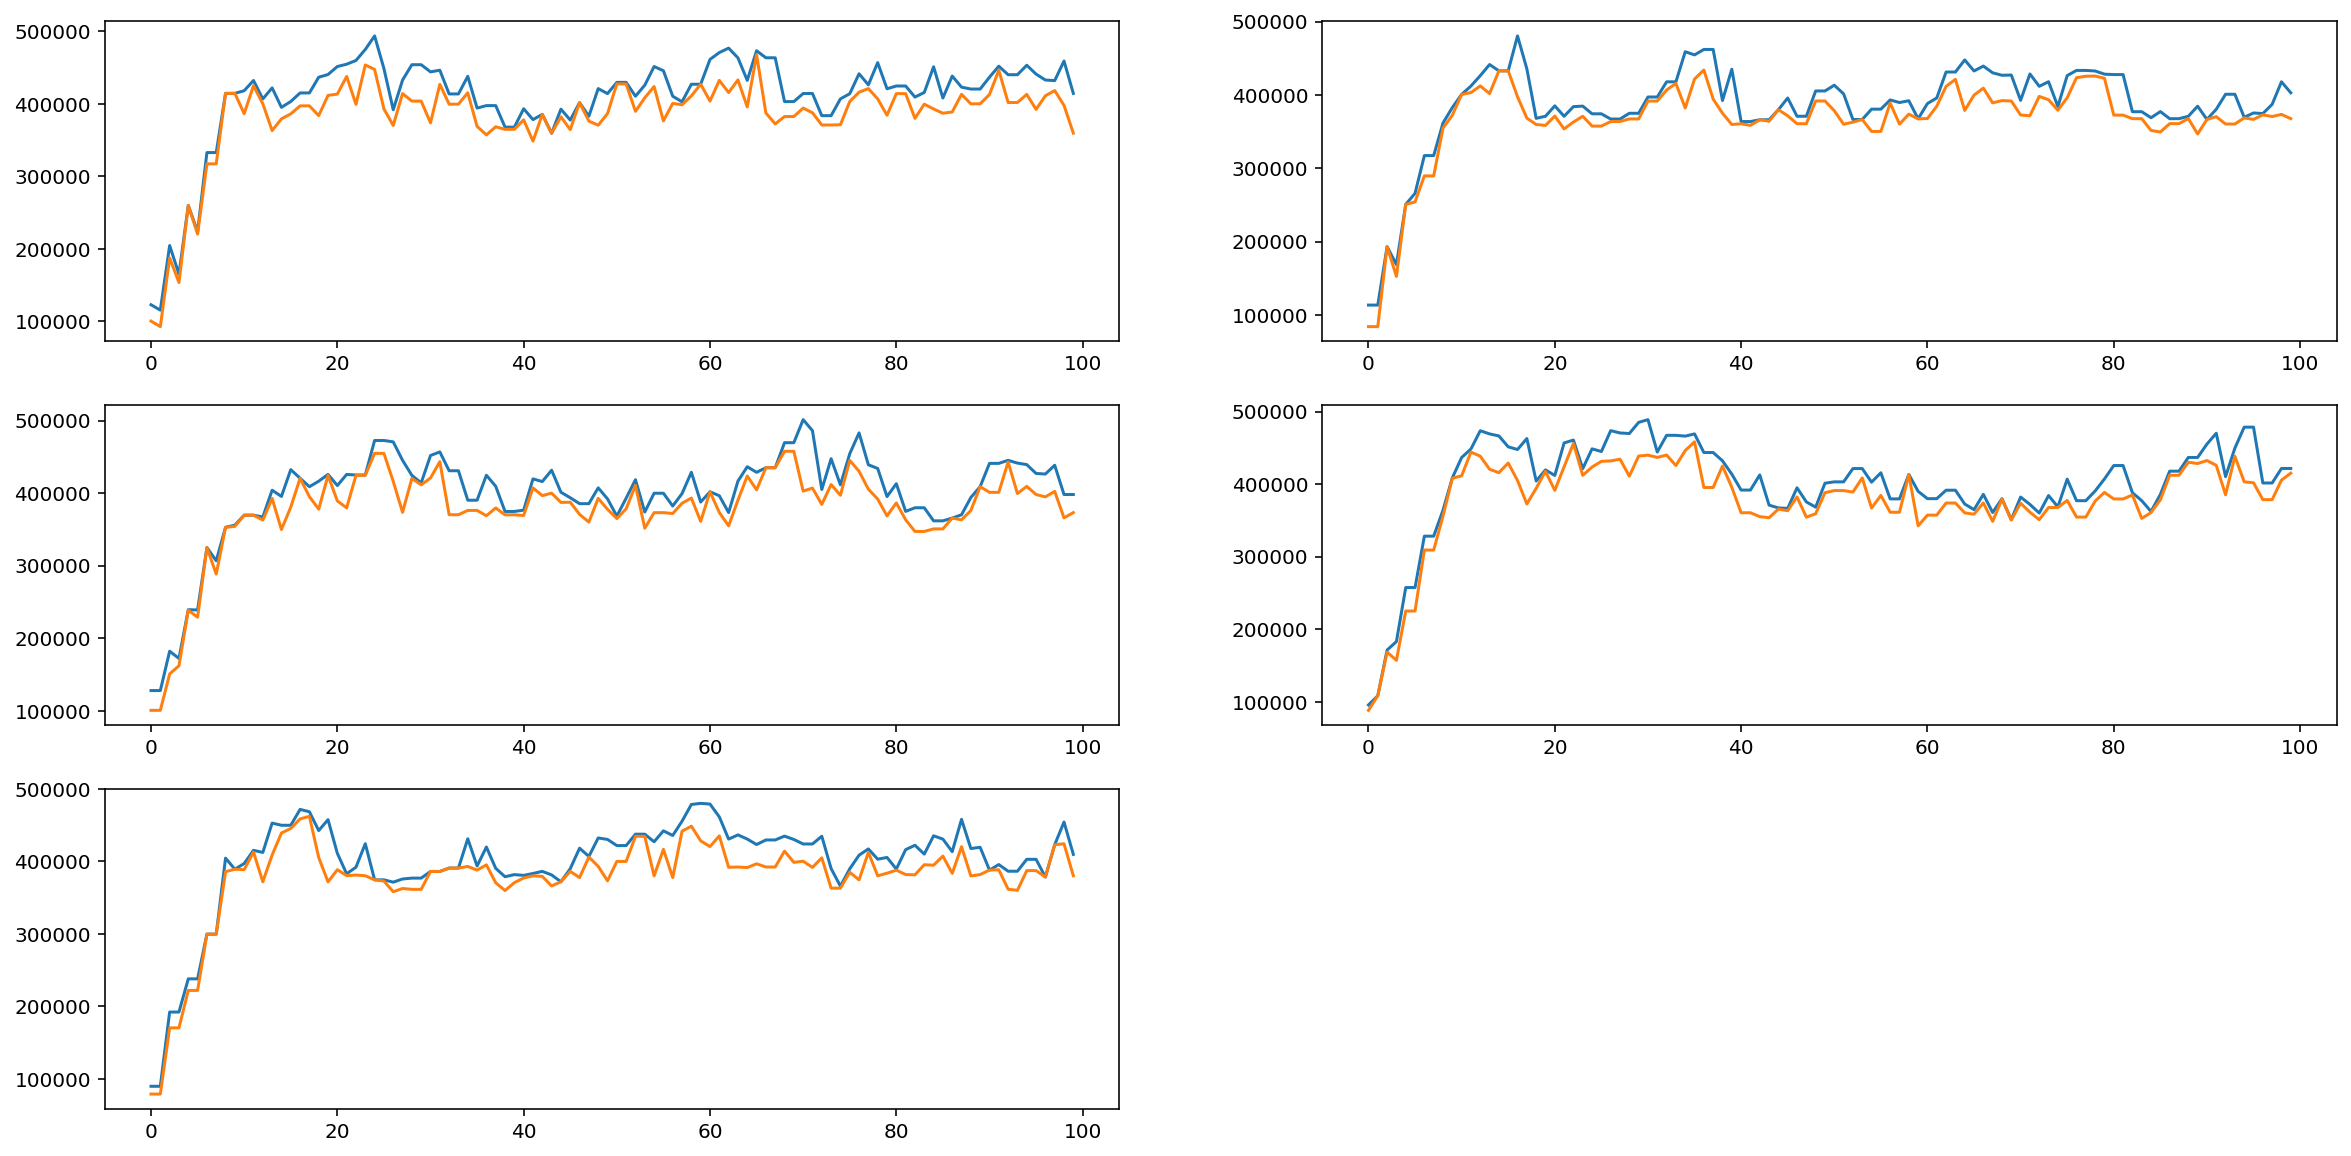

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(321)
plt.plot(randomvalid_step_costs_1)
plt.plot(rv_cost_minus_transports_1)
plt.subplot(322)
plt.plot(randomvalid_step_costs_2)
plt.plot(rv_cost_minus_transports_2)
plt.subplot(323)
plt.plot(randomvalid_step_costs_3)
plt.plot(rv_cost_minus_transports_3)
plt.subplot(324)
plt.plot(randomvalid_step_costs_4)
plt.plot(rv_cost_minus_transports_4)
plt.subplot(325)
plt.plot(randomvalid_step_costs_5)
plt.plot(rv_cost_minus_transports_5)

## Comparison of theoretical lower bounds

In [17]:
datarv=pd.DataFrame({"randomvalid_step_costs_1":randomvalid_step_costs_1,
"random_valid_step_transport_costs_1":random_valid_step_transport_costs_1,
"rv_cost_minus_transports_1":rv_cost_minus_transports_1,
"randomvalid_step_costs_2":randomvalid_step_costs_2,
"random_valid_step_transport_costs_2":random_valid_step_transport_costs_2,
"rv_cost_minus_transports_2":rv_cost_minus_transports_2,
"randomvalid_step_costs_3":randomvalid_step_costs_3,
"random_valid_step_transport_costs_3":random_valid_step_transport_costs_3,
"rv_cost_minus_transports_3":rv_cost_minus_transports_3,
"randomvalid_step_costs_4":randomvalid_step_costs_4,
"random_valid_step_transport_costs_4":random_valid_step_transport_costs_4,
"rv_cost_minus_transports_4":rv_cost_minus_transports_4,
"randomvalid_step_costs_5":randomvalid_step_costs_5,
"random_valid_step_transport_costs_5":random_valid_step_transport_costs_5,
"rv_cost_minus_transports_5":rv_cost_minus_transports_5}
)
rv_ratio_theoretical_1 = (datarv.randomvalid_step_costs_1.sum()-datarv.rv_cost_minus_transports_1.sum())/datarv.rv_cost_minus_transports_1.sum()
rv_ratio_theoretical_2 = (datarv.randomvalid_step_costs_2.sum()-datarv.rv_cost_minus_transports_2.sum())/datarv.rv_cost_minus_transports_2.sum()
rv_ratio_theoretical_3 = (datarv.randomvalid_step_costs_3.sum()-datarv.rv_cost_minus_transports_3.sum())/datarv.rv_cost_minus_transports_3.sum()
rv_ratio_theoretical_4 = (datarv.randomvalid_step_costs_4.sum()-datarv.rv_cost_minus_transports_4.sum())/datarv.rv_cost_minus_transports_4.sum()
rv_ratio_theoretical_5 = (datarv.randomvalid_step_costs_5.sum()-datarv.rv_cost_minus_transports_5.sum())/datarv.rv_cost_minus_transports_5.sum()

rv_theoretical_ratios = [rv_ratio_theoretical_1,rv_ratio_theoretical_2,rv_ratio_theoretical_3,rv_ratio_theoretical_4,rv_ratio_theoretical_5]
ratios_rv = pd.DataFrame(rv_theoretical_ratios,columns=['theoretical_ratio_from_optimal'])
ratios_rv

,theoretical_ratio_from_optimal
0,0.067256
1,0.055502
2,0.057600
3,0.058798
4,0.055349


Mean ratio from theoretical lower-bopund for random valid vs. best fit. They are both close to 5.8%, so it doesn't seems best fit did much in this case.

In [126]:
print("This ratio means that choosing a random")
ratios_rv.mean(),ratios_bestfit_df.mean()

(theoretical_ratio_from_optimal    0.058901
 dtype: float64,
 theoretical_ratio_from_optimal    0.057508
 dtype: float64)

# Conclusions
It seems that best fit does not really improve significantly from random selecting from valid inputs. Refactor this analysis and repeat for larger datasets and differently sized networks perhaps. Also, check inventory distributions across episodes to makes sure that's working.
